# The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:


\begin{align}
\frac{dx}{dt} & = \alpha x - \beta x y \\[6pt]
\frac{dy}{dt} & = \delta x y  - \gamma y
\end{align}
where

x is the number of prey (for example, rabbits);
y is the number of some predator (for example, foxes);
\tfrac{dy}{dt} and \tfrac{dx}{dt} represent the growth rates of the two populations over time;
t represents time; and
α, β, γ, δ are positive real parameters describing the interaction of the two species.

<IPython.core.display.Javascript object>


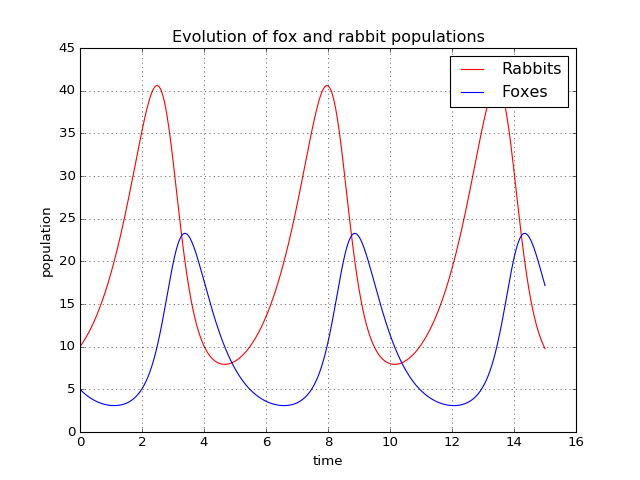

In [28]:
from numpy import *
import pylab as p
%matplotlib notebook

a = 1.
b = 0.1
c = 1.5
d = 0.75

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,  
                  -c*X[1] + d*b*X[0]*X[1] ])
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])

all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True 

def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])  
A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])

lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)

T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199
from scipy import integrate

t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes  

X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'
rabbits, foxes = X.T

#f1=p.figure()


p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend()
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')

p.show()



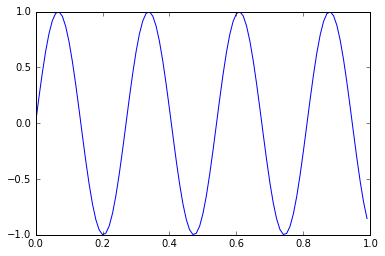

In [43]:
from ipywidgets import *
import pylab as plt
%matplotlib inline

x=arange(0.0,1.0,0.01)
def pltsin(f):
    plt.plot(x,sin(2*pi*x*f))
    plt.show()
interact(pltsin,f=(0.0,10,0.1))